<a href="https://colab.research.google.com/github/paulagm12/DSPS_PGalvezMolina/blob/main/HW4_PGalvezMolina/HW4_PGalvezMolina_MWrotCurvepynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [1]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex

import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

Starting from Newton's Law  

$$\begin{eqnarray}F~=~\frac{GMm}{r^2}\\
Ma = ~\frac{GMm}{r^2}
\end{eqnarray}$$

Where $m$ is $m(r)$ the mass contained within the radius under observation, and $a$ is the centripetal acceleration since gravity acts as a centripetal force. Then, we can re-write

$$
\begin{eqnarray}Ma = ~\frac{GMm}{r^2}\\
M~\frac{v^2}{r} = ~\frac{GMm(r)}{r^2}\\
v^2 = \frac{G \cdot m(r)}{r}
\end{eqnarray}
$$
Namely,
$$
v\propto\frac{1}{\sqrt{r}}.
$$

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv",
                  delimiter=",", header = 1)
m31.rename(columns={'#R(kpc': 'r', 'V(km/s)': 'v', 'St.dev.': 'dv', 'St.error': 'err'}, inplace = True)

In [3]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


# exploratory data analysis
proceed with at least a few basic exploratory tasks

There are 55 records in the file.


Text(0, 0.5, 'Frequency')

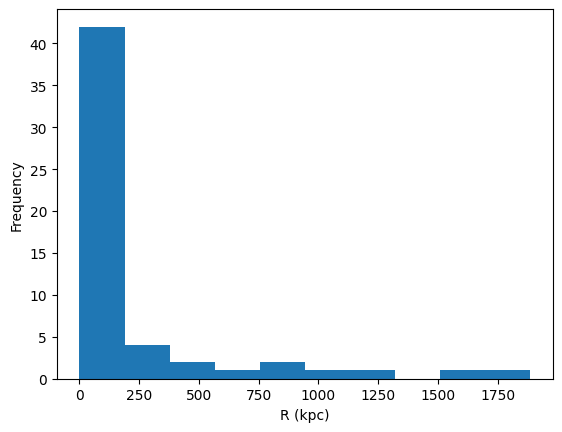

In [4]:
print('There are {} records in the file.'.format(len(m31)))
plt.hist(m31['r'])
plt.xlabel("R (kpc)")
plt.ylabel("Frequency")

# Fig. 1. Histogram of radius in the m31 data set. Part of exploratory analysis.

Text(0, 0.5, 'Frequency')

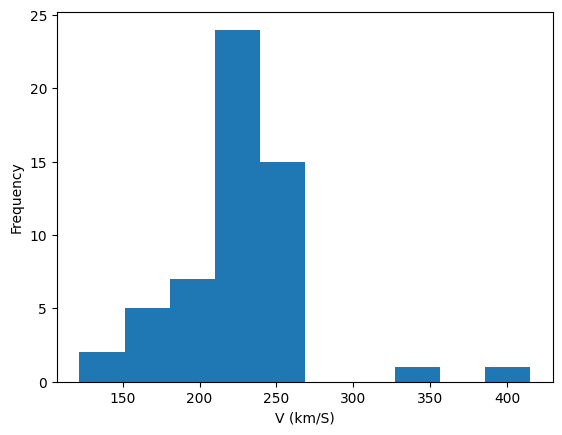

In [5]:
plt.hist(m31['v'])
plt.xlabel("V (km/S)")
plt.ylabel("Frequency")

# Fig. 2. Histogram of velocity in the m31 data set. Part of exploratory analysis.

Text(0, 0.5, 'Frequency')

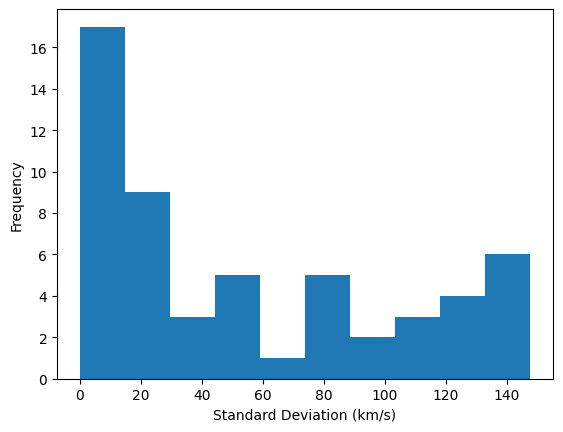

In [6]:
plt.hist(m31['dv'])
plt.xlabel("Standard Deviation (km/s)")
plt.ylabel("Frequency")

# Fig. 3. Histogram of velocity's standard deviation in the m31 data set. Part of exploratory analysis.

Text(0, 0.5, 'Frequency')

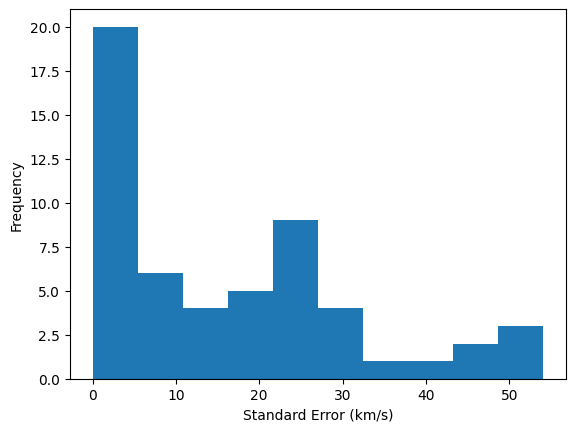

In [7]:
plt.hist(m31['err'])
plt.xlabel("Standard Error (km/s)")
plt.ylabel("Frequency")

# Fig. 4. Histogram of standard error of the velocity in the m31 data set. Part of exploratory analysis.

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [8]:
# 3.167° × 1° data from Wikipedia
apparentSizeM31 = 3.167

In [9]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.5f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.05527 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [10]:
# 2.57 ± 0.06 million light-years
m31Distance = 2.57*10**6 * 0.000306601 * u.kpc
m31DistanceError = 0.06 * 10**6 * 0.000306601 * u.kpc
print("Distance of the visible component of Andromeda: {:.2e} +/- {:.1e}".format(m31Distance, m31DistanceError))

Distance of the visible component of Andromeda: 7.88e+02 kpc +/- 1.8e+01 kpc


In [11]:
# Using small angle approximation
m31Size = m31Distance * m31angS.to(u.rad).value
m31SizeError = m31DistanceError * m31angS.to(u.rad).value
print("Size of the visible component of Andromeda: " +
      r"{:.1f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


Size of the visible component of Andromeda: 43.6 kpc +/- 1.0 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [12]:
smallR = m31[m31['r'] >= m31Size].sort_values(by = 'r').iloc[0][0]
smallV = m31[m31['r'] >= m31Size].sort_values(by = 'r').iloc[0][1]
print(smallR, smallV)

49.222 237.069


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [105]:
def getradii(df, N, size):
    """
    Extracts measurements for the first radius greater than or equal to N times the given size.

    Parameters:
    df (DataFrame): A DataFrame containing measurement data, with columns 'r', 'v', 'dv', and 'err'.
    N (int): Multiplier for the given size to determine the minimum radius for selection (number of galactic radii).
    size (float): The size used to calculate the minimum radius (size) for selection.

    Returns:
    tuple: A tuple containing the radius (r), velocity (v), velocity uncertainty (dv), and error (err)
    for the first measurement that meets the criteria.
    """

    smallest_vals = df[df['r'] >= N*size].sort_values(by = 'r')
    r = smallest_vals.iloc[0][0]
    v = smallest_vals.iloc[0][1]
    dv = smallest_vals.iloc[0][2]
    err = smallest_vals.iloc[0][3]
    return r, v, dv, err

In [102]:
getradii(m31, 1, m31Size/2)

(23.738, 236.511, 11.729, 1.58)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

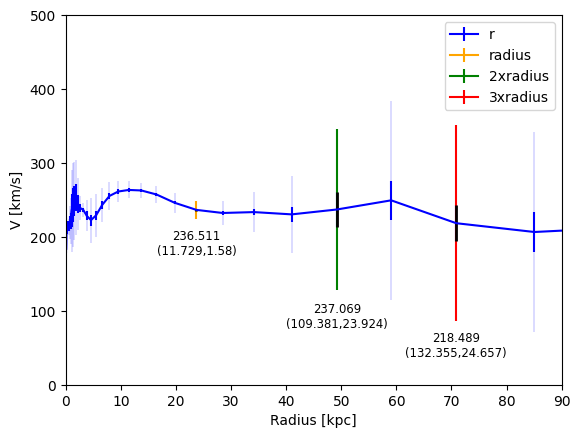

In [15]:
plt.errorbar(m31['r'], m31['v'], m31['err'], color = 'blue', label = "r") #1 and 2
plt.errorbar(m31['r'], m31['v'], m31['dv'], color = 'blue', linewidth = 0.2) #3
plt.errorbar(getradii(m31, 1, m31Size/2)[0],  getradii(m31, 1, m31Size/2)[1], yerr = getradii(m31, 1, m31Size/2)[2], color = 'orange', label = "radius")
plt.errorbar(getradii(m31, 2, m31Size/2)[0],  getradii(m31, 2, m31Size/2)[1], yerr = getradii(m31, 2, m31Size/2)[2], color = 'green', label = "2xradius")
plt.errorbar(getradii(m31, 3, m31Size/2)[0],  getradii(m31, 3, m31Size/2)[1], yerr = getradii(m31, 3, m31Size/2)[2], color = 'red', label = "3xradius")
plt.errorbar(getradii(m31, 1, m31Size/2)[0],  getradii(m31, 1, m31Size/2)[1], yerr = getradii(m31, 1, m31Size/2)[3], color = 'black', linewidth = 2)
plt.errorbar(getradii(m31, 2, m31Size/2)[0],  getradii(m31, 2, m31Size/2)[1], yerr = getradii(m31, 2, m31Size/2)[3], color = 'black', linewidth = 2)
plt.errorbar(getradii(m31, 3, m31Size/2)[0],  getradii(m31, 3, m31Size/2)[1], yerr = getradii(m31, 3, m31Size/2)[3], color = 'black', linewidth = 2)

plt.text(getradii(m31, 1, m31Size/2)[0],  getradii(m31, 1, m31Size/2)[1]-60, '{}\n({},{})'.format(getradii(m31, 1, m31Size/2)[1],  getradii(m31, 1, m31Size/2)[2], getradii(m31, 1, m31Size/2)[3]), horizontalalignment = 'center', fontsize = 'small')
plt.text(getradii(m31, 2, m31Size/2)[0],  getradii(m31, 2, m31Size/2)[1]-160, '{}\n({},{})'.format(getradii(m31, 2, m31Size/2)[1],  getradii(m31, 2, m31Size/2)[2], getradii(m31, 2, m31Size/2)[3]), horizontalalignment = 'center', fontsize = 'small')
plt.text(getradii(m31, 3, m31Size/2)[0],  getradii(m31, 3, m31Size/2)[1]-180, '{}\n({},{})'.format(getradii(m31, 3, m31Size/2)[1],  getradii(m31, 3, m31Size/2)[2], getradii(m31, 3, m31Size/2)[3]), horizontalalignment = 'center', fontsize = 'small')

plt.ylim(0, 500)
plt.xlim(0, 90)
plt.xlabel("Radius [kpc]")
plt.ylabel("V [km/s]")
plt.legend()
plt.show()

# Fig. 5. Velocity vs. Radius plot of the m31 data set. The blue line shows the corresponding velocity as the size (radius) of the galaxy increases with its corresponding error (the thicker line is the standard error, and the fainter the standard deviation). In orange, green and red the data for 1,2 and 3 galactic radii is shown with the corresponding standard deviation and standard error for each as well (black).

In [106]:
def plotGal(gal, rds):

    """
    Plots a galaxy's velocity vs. radius (size) profile along with error bars and key radii points.

    Parameters:
    gal (DataFrame): A DataFrame containing galaxy measurement data with columns 'r', 'v', 'dv', and 'err'.
    rds (float): The size parameter used to calculate radii for plotting.

    Returns:
    None: The function generates a plot using Matplotlib to visualize the galaxy's velocity profile.
    """

    plt.errorbar(gal['r'], gal['v'], gal['err'], color = 'blue', label = "r") #1 and 2
    plt.errorbar(gal['r'], gal['v'], gal['dv'], color = 'blue', linewidth = 0.2) #3
    plt.errorbar(getradii(gal, 1, rds)[0],  getradii(gal, 1, rds)[1], yerr = getradii(gal, 1, rds)[2], color = 'orange', label = "radius")
    plt.errorbar(getradii(gal, 2, rds)[0],  getradii(gal, 2, rds)[1], yerr = getradii(gal, 2, rds)[2], color = 'green', label = "2xradius")
    plt.errorbar(getradii(gal, 3, rds)[0],  getradii(gal, 3, rds)[1], yerr = getradii(gal, 3, rds)[2], color = 'red', label = "3xradius")
    plt.errorbar(getradii(gal, 1, rds)[0],  getradii(gal, 1, rds)[1], yerr = getradii(gal, 1, rds)[3], color = 'black', linewidth = 2)
    plt.errorbar(getradii(gal, 2, rds)[0],  getradii(gal, 2, rds)[1], yerr = getradii(gal, 2, rds)[3], color = 'black', linewidth = 2)
    plt.errorbar(getradii(gal, 3, rds)[0],  getradii(gal, 3, rds)[1], yerr = getradii(gal, 3, rds)[3], color = 'black', linewidth = 2)

    plt.text(getradii(gal, 1, rds)[0],  getradii(gal, 1, rds)[1]-getradii(gal, 1, rds)[2], '{}\n({},{})'.format(getradii(gal, 1, rds)[1],  getradii(gal, 1, rds)[2], getradii(gal, 1, rds)[3]), horizontalalignment = 'center', verticalalignment="top", fontsize = 'small')
    plt.text(getradii(gal, 2, rds)[0],  getradii(gal, 2, rds)[1]- getradii(gal, 2, rds)[2], '{}\n({},{})'.format(getradii(gal, 2, rds)[1],  getradii(gal, 2, rds)[2], getradii(gal, 2, rds)[3]), horizontalalignment = 'center', verticalalignment="top",fontsize = 'small')
    plt.text(getradii(gal, 3, rds)[0],  getradii(gal, 3, rds)[1]-getradii(gal, 3, rds)[2], '{}\n({},{})'.format(getradii(gal, 3, rds)[1],  getradii(gal, 3, rds)[2], getradii(gal, 3, rds)[3]), horizontalalignment = 'center', verticalalignment="top", fontsize = 'small')

    plt.ylim(0, 500)
    plt.xlim(0, 90)
    plt.xlabel("R [kpc]")
    plt.ylabel("V [km/s]")
    plt.legend()
    plt.show()

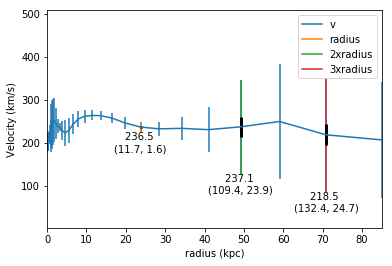

In [ ]:
# Prof. Bianco's graph

# Fig. 6. Professor Bianco's given graph to reproduce.

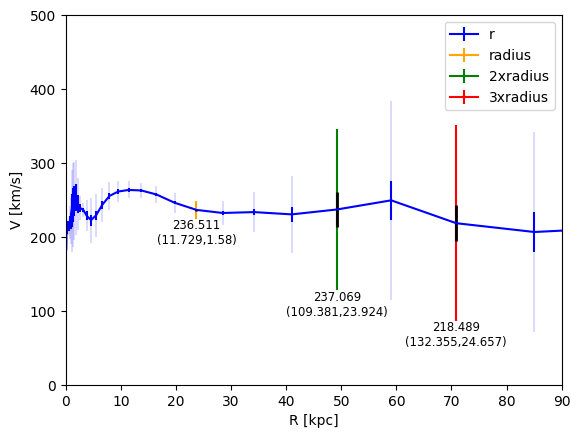

In [107]:
m31Rds = m31Size/2
plotGal(m31, m31Rds)

# Fig. 7. Same as Fig.6 only that this was generated through a function.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [112]:
def vratios(df, rds, N, err = 'dv'):
    """
    Calculate and print the velocity ratios for a given galaxy dataset at specified (galactic) radii multiples.

    Parameters:
    df (DataFrame): A DataFrame containing galaxy measurement data with columns 'r', 'v', 'dv', and 'err'.
    rds (float): The size parameter used to calculate radii for the specified multiples.
    N (int): The multiple of (galactic) radii for which to calculate the velocity ratio.
    err (str, optional): The type of error to consider. Default is 'dv'.

    Returns:
    None: The function prints the calculated velocity ratios and related information.
    """
    error = 2 if err == 'dv' else 3
    smallR_1 = getradii(df, 1, rds)[0]
    smallV_1 = getradii(df, 1, rds)[1]
    err_1 = getradii(df, 1, rds)[error]
    smallR_N = getradii(df, N, rds)[0]
    smallV_N = getradii(df, N, rds)[1]
    err_N = getradii(df, N, rds)[2]

    cratioV = smallV_1/smallV_N
    eratioV = (smallR_N/smallR_1)**(1/2) # From the equation v² = Gm/r we have that the expected ratio \sqrt(r_2/r_1) = v_1/v_2
    uncertainty = cratioV * ((err_1/smallV_1)**2 + (err_N/smallV_N)**2)**0.5
    agreement = "" if eratioV >= cratioV - 2 * uncertainty and eratioV <= cratioV + 2*uncertainty else " not"

    print("For N = {} and {} as our error type:".format(N, err))
    print("The expected velocity ratio based on the radii (radius at N = 1/ radius at N = {}) is {:.5f}.".format(N, eratioV))
    print("The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = {}) is {:.5f} +/- {:.5f}.".format(N, cratioV, uncertainty))
    print("Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are {:.5f} and {:.5f} respectively.".format(cratioV + 2*uncertainty, cratioV - 2*uncertainty))
    print("Which means that the expected ratio is{} within the $2-\sigma$ of the calculated ratio.\n".format(agreement))

In [113]:
m31Rds = m31Size/2
vratios(m31, m31Rds, 1)

vratios(m31, m31Rds, 1, err='err')

For N = 1 and dv as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 1) is 1.00000.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 1) is 1.00000 +/- 0.07013.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 1.14027 and 0.85973 respectively.
Which means that the expected ratio is within the $2-\sigma$ of the calculated ratio.

For N = 1 and err as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 1) is 1.00000.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 1) is 1.00000 +/- 0.05004.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 1.10008 and 0.89992 respectively.
Which means that the expected ratio is within the $2-\sigma$ of the calculated ratio.



In [23]:
vratios(m31, m31Size/2, 2, err = 'err')

For N = 2 and err as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 2) is 1.43998.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 2) is 0.99765 +/- 0.46035.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 1.91835 and 0.07694 respectively.
Which means that the expected ratio is within the $2-\sigma$ of the calculated ratio.



In [21]:
vratios(m31, m31Rds, 2)

For N = 2 and dv as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 2) is 1.43998.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 2) is 0.99765 +/- 0.46295.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 1.92355 and 0.07174 respectively.
Which means that the expected ratio is within the $2-\sigma$ of the calculated ratio.



In [22]:
vratios(m31, m31Rds, 2, err='err')

For N = 2 and err as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 2) is 1.43998.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 2) is 0.99765 +/- 0.46035.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 1.91835 and 0.07694 respectively.
Which means that the expected ratio is within the $2-\sigma$ of the calculated ratio.



In [47]:
m = 25
vratios(m31, m31Rds, m)
vratios(m31, m31Rds, m, err='err')

For N = 25 and dv as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 25) is 5.15974.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 25) is 0.98970 +/- 0.61422.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 2.21813 and -0.23874 respectively.
Which means that the expected ratio is not within the $2-\sigma$ of the calculated ratio.

For N = 25 and err as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 25) is 5.15974.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 25) is 0.98970 +/- 0.61229.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 2.21428 and -0.23488 respectively.
Which means that the expected ratio is not within the $2-\sigma$ of the calculated ratio.



### Discuss!

###### Comparing the discrepancy results for N between 1 and 25 it appears that for values less than 10 the expected calculations lie withing the 2 $\sigma$ range from the calculated ratio. However, for N larger than 10, the majority of expected values are not within the 2 $\sigma$ range from the calculated ratio, despite of the large errors. This might be indicating "missing mass" of the galaxy, namely some preliminary evidence for dark matter.  


## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

Size of the visible component of the Milky Way: 26.8 kpc +/- 1.1 kpc


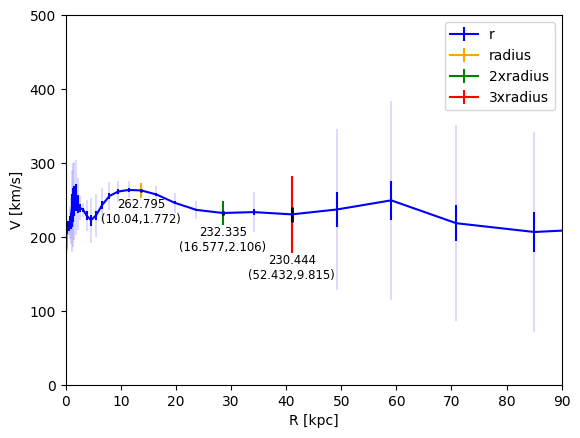

In [98]:
# Following the same steps as in the data from Andromeda

mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv",
                  delimiter=",", header = 1)
mw.rename(columns={'#R(kpc': 'r', 'V(km/s)': 'v', 'St.dev.': 'dv', 'St.error': 'err'}, inplace = True)

# Using data from Wikipedia
mwSize = 26.8 * u.kpc
mwSizeError = 1.1 * u.kpc
print("Size of the visible component of the Milky Way: " +
      r"{:.1f} +/- {:2.1f}".format(mwSize, mwSizeError))

mwRds = mwSize/2
plotGal(mw, mwRds)

# Fig. 8. Velocity vs. Radius plot of the mw data set. The blue line shows the corresponding velocity as the size (radius) of the galaxy increases with its corresponding error (the thicker line is the standard error, and the fainter the standard deviation). In orange, green and red the data for 1,2 and 3 galactic radii is shown with the corresponding standard deviation and standard error for each as well (black).

In [100]:
for N in range(1, 26):
  print(N)
  vratios(mw, mwRds, N, err = 'dv')
  vratios(mw, mwRds, N, err = 'err')

1
For N = 1 and dv as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 1) is 1.00000.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 1) is 1.00000 +/- 0.05403.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 1.10806 and 0.89194 respectively.
Which means that the expected ratio is within the $2-\sigma$ of the calculated ratio.

For N = 1 and err as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ radius at N = 1) is 1.00000.
The calculated ratio based on the velocities (with uncertainty) (radius at N = 1/ radius at N = 1) is 1.00000 +/- 0.03880.
Thus, the 2-$\sigma$ upper and lower limits of the calculated ratio are 1.07759 and 0.92241 respectively.
Which means that the expected ratio is within the $2-\sigma$ of the calculated ratio.

2
For N = 2 and dv as our error type:
The expected velocity ratio based on the radii (radius at N = 1/ ra

### Discussion

#### Analogous to the results from the Andromeda data, the majority of expected ratios between 1 and 25 galactic radii from the Milky Way do not fall under the $2\sigma$ range of the calculated value for the ratio of velocities. Again, this might be an indication of more mass in the galaxy, a preliminary evidence for dark matter.

https://en.wikipedia.org/wiki/Milky_Way
    